In [1]:
import os
import sys
import pandas as pd
from pathlib import Path
import math

In [2]:
#from io import StringIO
#import csv
#from utils import read_data, make_output_directories
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Comparison demo-cartpole-[DQN|Rainbow]

In [4]:
# Comparison between...

worlds = [
#     {'code': ('cartpole','dqn','demo')},
#     {'code': ('cartpole','rainbow','demo')},
    {'code': ('kdd99','dqn','')},
    {'code': ('kdd99','rainbow','')}
]

#### Path

In [5]:
# FUNCTION for Path
def path_from_details(env: str, alg: str, demo: str = '') -> str:
    return os.path.join(
        Path(os.getcwd()).parent.parent,
        "output",
        demo, # ''|'demo'
        alg,  # 'rainbow'|'dqn'
        env,  # 'cartpole'|'kdd99'
        "latest"
    )

In [6]:
# Get paths
for world in worlds:
    world['path'] = path_from_details(*world['code'])

#### Load Scores & Losses

In [7]:
# Function to Read Data
concat = lambda x,y: os.path.join(x,f'{y}.csv')
def load_scores_losses(world):
    world['losses'] = pd.read_csv(concat(world['path'],'losses'), names=['loss'])
    world['scores'] = pd.read_csv(concat(world['path'],'scores'), names=['score'])
def read_metadata(world):
    with open(os.path.join(world['path'],'metadata.json'), 'r') as f:
        world['metadata'] = json.load(f)

In [8]:
for world in worlds:    
    load_scores_losses(world)
    read_metadata(world)

In [9]:
world['scores'].head()

score
0      0
1    -10
2    -10
3     -4
4      0

In [10]:
world['losses'].head()

loss
0  0.000000
1  3.032259
2  2.791322
3  2.957018
4  2.872076

In [11]:
world['metadata']

{'alpha': 0.2,
 'atom_size': 20,
 'batch_size': 5,
 'beta': 1.0,
 'gamma': 0.2,
 'n_step': 1,
 'name': 'kdd99',
 'num_frames': 249996,
 'prior_eps': 1e-06,
 'target_update': 100,
 'total_obs': 250000,
 'v_max': 10.0,
 'v_min': -10.0}

#### Plotting Loss

249997
kdd99-dqn-
kdd99-rainbow-


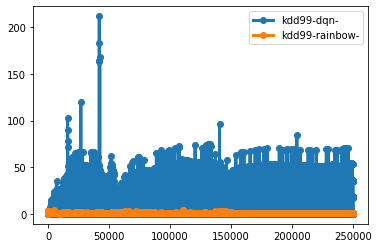

In [13]:
min_ = float('inf')
for world in worlds:
    if len(world['losses']['loss'])<min_:
        min_ = len(world['losses']['loss'])
print(min_)

# Data
df=pd.DataFrame()
df['x'] = range(min_)
for world in worlds:
    col = "-".join(world['code'])
    print(col)
    df[col] = world['losses'].iloc[0:min_,:]['loss']

# multiple line plot
for world in worlds:
        plt.plot(
            'x',
            "-".join(world['code']),
            data=df,
            marker='o',
            #markerfacecolor='blue',
            markersize=6,
            #color='skyblue',
            linewidth=3
        )
plt.legend()

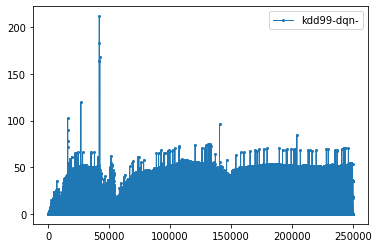

In [14]:
plt.plot(
    'x',
    "-".join(worlds[0]['code']),
    data=df,
    marker='o',
    markersize=2,
    linewidth=1
)
plt.legend()

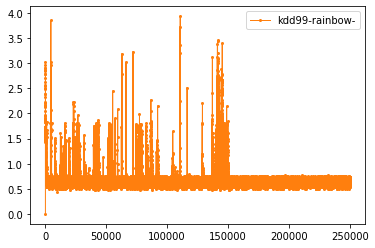

In [15]:
plt.plot(
    'x',
    "-".join(worlds[1]['code']),
    data=df,
    marker='o',
    markersize=2,
    color='tab:orange',
    linewidth=1
)
plt.legend()

#### Plotting Scores

25001
kdd99-dqn-
kdd99-rainbow-


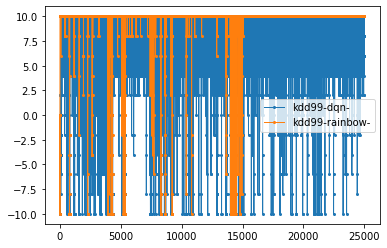

In [16]:
min_ = float('inf')
for world in worlds:
    if len(world['scores']['score'])<min_:
        min_ = len(world['scores']['score'])
print(min_)

# Data
df=pd.DataFrame()
df['x'] = range(min_)
for world in worlds:
    col = "-".join(world['code'])
    print(col)
    df[col] = world['scores'].iloc[0:min_,:]['score']

# multiple line plot
for world in worlds:
        plt.plot(
            'x',
            "-".join(world['code']),
            data=df,
            marker='o',
            #markerfacecolor='blue',
            markersize=2,
            #color='skyblue',
            linewidth=1
        )
plt.legend()

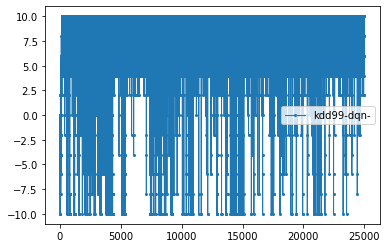

In [17]:
plt.plot(
    'x',
    "-".join(worlds[0]['code']),
    data=df,
    marker='o',
    #markerfacecolor='blue',
    markersize=2,
    #color='skyblue',
    linewidth=1
)
plt.legend()

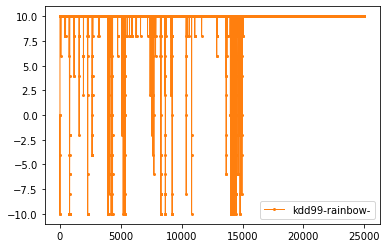

In [18]:
plt.plot(
    'x',
    "-".join(worlds[1]['code']),
    data=df,
    marker='o',
    markersize=2,
    color='tab:orange',
    linewidth=1
)
plt.legend()

# F1 scores, accuracy, recall, and precision

In [12]:
root_path = Path(os.getcwd()).parent.parent
rainbow_path = root_path/'output'/'rainbow'/'kdd99'/"latest"
dqn_path = root_path/'output'/'dqn'/'kdd99'/"latest"
attack_families = ['normal', 'dos', 'u2r', 'r2l', 'probe']

In [13]:
rainbow_real_pred = pd.read_csv(rainbow_path/'real_pred.csv')
dqn_real_pred = pd.read_csv(dqn_path/'real_pred.csv')
print("RAINBOW")
print(rainbow_real_pred.head())
print("DQN")
print(dqn_real_pred.head())

RAINBOW
     real pred
0  normal  dos
1  normal  dos
2  normal  dos
3  normal  dos
4  normal  dos
DQN
     real    pred
0  normal   probe
1  normal   probe
2  normal   probe
3  normal  normal
4  normal     u2r


In [14]:
# tp_tn = df_real_pred["real"] == df_real_pred["pred"]
# print(tp_tn & df_real_pred["real"]=="normal")
index_tp_tn_rainbow = (rainbow_real_pred["real"] == rainbow_real_pred["pred"]).to_numpy()
index_tp_tn_dqn = (dqn_real_pred["real"] == dqn_real_pred["pred"]).to_numpy()
# TP
tp_rainbow = {}
print("TP RAINBOW:")
for a in attack_families:
    index_tp = (rainbow_real_pred["real"]==a).to_numpy() & index_tp_tn_rainbow
    tp_rainbow[a] = rainbow_real_pred[index_tp].count()[0]
    print("\t",a, tp_rainbow[a])

tp_dqn = {}
print("TP DQN:")
for a in attack_families:
    index_tp = (dqn_real_pred["real"]==a).to_numpy() & index_tp_tn_dqn
    tp_dqn[a] = dqn_real_pred[index_tp].count()[0]
    print("\t",a, tp_dqn[a])

print("ALL RAINBOW")
total_rainbow={}
for a in attack_families:
    index_all = (rainbow_real_pred["real"]==a).to_numpy()
    total_rainbow[a] = rainbow_real_pred[index_all].count()[0]
    print("\t",a, total_rainbow[a])

print("ALL DQN")
total_dqn={}
for a in attack_families:
    index_all = (dqn_real_pred["real"]==a).to_numpy()
    total_dqn[a] = dqn_real_pred[index_all].count()[0]
    print("\t",a, total_dqn[a])

TP RAINBOW:
	 normal 70882
	 dos 173525
	 u2r 0
	 r2l 479
	 probe 1993
TP DQN:
	 normal 59820
	 dos 156537
	 u2r 3
	 r2l 120
	 probe 1661
ALL RAINBOW
	 normal 71225
	 dos 174302
	 u2r 29
	 r2l 1125
	 probe 3319
ALL DQN
	 normal 71225
	 dos 174302
	 u2r 29
	 r2l 1125
	 probe 3319


dos       174302
normal     71225
probe       3319
r2l         1125
u2r           29
Name: real, dtype: int64


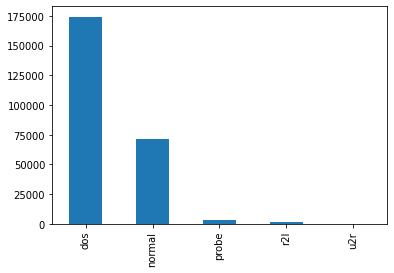

In [15]:
rainbow_real_pred['real'].value_counts().plot(kind='bar')
print(rainbow_real_pred['real'].value_counts())

## Accuracy

$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN} = \frac{\sum real==pred}{\sum all}$$

RAINBOW
(TP+TN)/all = 246879 / 250000 = 0.987516
DQN
(TP+TN)/all = 218141 / 250000 = 0.872564


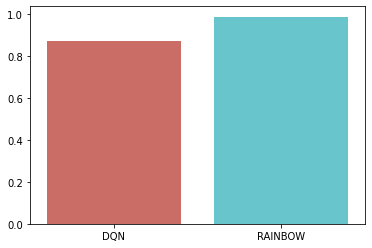

In [16]:
# RAINBOW
print("RAINBOW")
general_acc_rainbow = index_tp_tn_rainbow.sum() / len(rainbow_real_pred)
print(f'(TP+TN)/all = {index_tp_tn_rainbow.sum()} / {len(rainbow_real_pred)} = {general_acc_rainbow}')

# DQN
print("DQN")
general_acc_dqn = index_tp_tn_dqn.sum() / len(dqn_real_pred)
print(f'(TP+TN)/all = {index_tp_tn_dqn.sum()} / {len(dqn_real_pred)} = {general_acc_dqn}')
sns.barplot(x = ['DQN', 'RAINBOW'], y = [general_acc_dqn, general_acc_rainbow], palette = 'hls')
plt.show()

In [17]:
# RAINBOW
print("RAINBOW")
acc_rainbow = {}
print("Accuracy:")
for a in attack_families:
    acc_rainbow[a] = tp_rainbow[a] / total_rainbow[a]
print(json.dumps(acc_rainbow, indent=4))

# DQN
print("DQN")
acc_dqn = {}
print("Accuracy:")
for a in attack_families:
    acc_dqn[a] = tp_dqn[a] / total_dqn[a]
print(json.dumps(acc_dqn, indent=4))
##################################
#################################

RAINBOW
Accuracy:
{
    "normal": 0.9951842751842752,
    "dos": 0.9955422198253606,
    "u2r": 0.0,
    "r2l": 0.42577777777777776,
    "probe": 0.6004820729135282
}
DQN
Accuracy:
{
    "normal": 0.8398736398736398,
    "dos": 0.8980791958784179,
    "u2r": 0.10344827586206896,
    "r2l": 0.10666666666666667,
    "probe": 0.5004519433564326
}


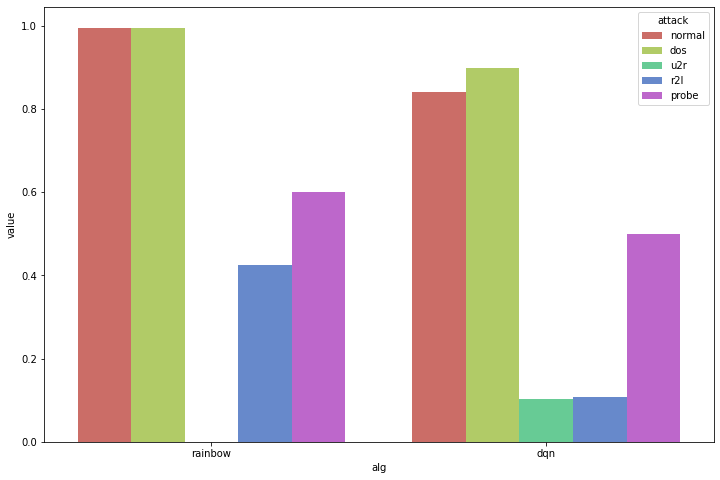

In [18]:
acc={'value':[],'attack':[],'alg':[]}
for a in attack_families:
    acc['value'].extend([acc_rainbow[a], acc_dqn[a]])
    acc['attack'].extend([a,a])
    acc['alg'].extend(['rainbow', 'dqn'])
acc = pd.DataFrame(acc)
# Figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.barplot(x = "alg", y = "value", hue = "attack", data = acc, palette = 'hls')
plt.show()

## Precision

$$\text{Precision}=\frac{TP}{TP+FP} = \frac{\sum (real==pred | real==attack_i)}{\sum pred==attack_i}$$

In [19]:
# RAINBOW
print("RAINBOW")
prec_rainbow = {}
print("Precision:")
for a in attack_families:
    b = rainbow_real_pred["pred"]==a
    prec_rainbow[a] = tp_rainbow[a] / b.sum()
print(json.dumps(prec_rainbow, indent=4))

# DQN
print("DQN")
prec_dqn = {}
print("Precision:")
for a in attack_families:
    b = dqn_real_pred["pred"]==a
    prec_dqn[a] = tp_dqn[a] / b.sum()
print(json.dumps(prec_dqn, indent=4))

RAINBOW
Precision:
{
    "normal": 0.9859785783836417,
    "dos": 0.9962624012493111,
    "u2r": 0.0,
    "r2l": 0.6842857142857143,
    "probe": 0.8118126272912424
}
DQN
Precision:
{
    "normal": 0.8986299723590915,
    "dos": 0.9739430704619692,
    "u2r": 0.00043047783039173483,
    "r2l": 0.01692524682651622,
    "probe": 0.19206753006475485
}


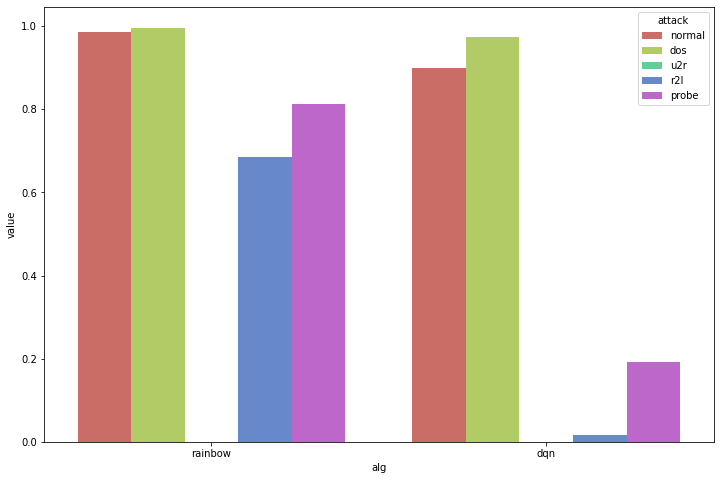

In [20]:
prec={'value':[],'attack':[],'alg':[]}
for a in attack_families:
    prec['value'].extend([prec_rainbow[a], prec_dqn[a]])
    prec['attack'].extend([a,a])
    prec['alg'].extend(['rainbow', 'dqn'])
prec = pd.DataFrame(prec)
# Figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.barplot(x = "alg", y = "value", hue = "attack", data = prec, palette = 'hls')
plt.show()

## Recall

$$\text{Recall}=\frac{TP}{TP+FN} = \frac{\sum (real==pred | real==attack_i)}{\sum real==attack_i}$$

In [21]:
# RAINBOW
print("RAINBOW")
rec_rainbow = {}
print("Recall:")
for a in attack_families:
    b = rainbow_real_pred["real"]==a
    rec_rainbow[a] = tp_rainbow[a] / b.sum()
print(json.dumps(rec_rainbow, indent=4))

# DQN
print("DQN")
rec_dqn = {}
print("Recall:")
for a in attack_families:
    b = dqn_real_pred["real"]==a
    rec_dqn[a] = tp_dqn[a] / b.sum()
print(json.dumps(rec_dqn, indent=4))

RAINBOW
Recall:
{
    "normal": 0.9951842751842752,
    "dos": 0.9955422198253606,
    "u2r": 0.0,
    "r2l": 0.42577777777777776,
    "probe": 0.6004820729135282
}
DQN
Recall:
{
    "normal": 0.8398736398736398,
    "dos": 0.8980791958784179,
    "u2r": 0.10344827586206896,
    "r2l": 0.10666666666666667,
    "probe": 0.5004519433564326
}


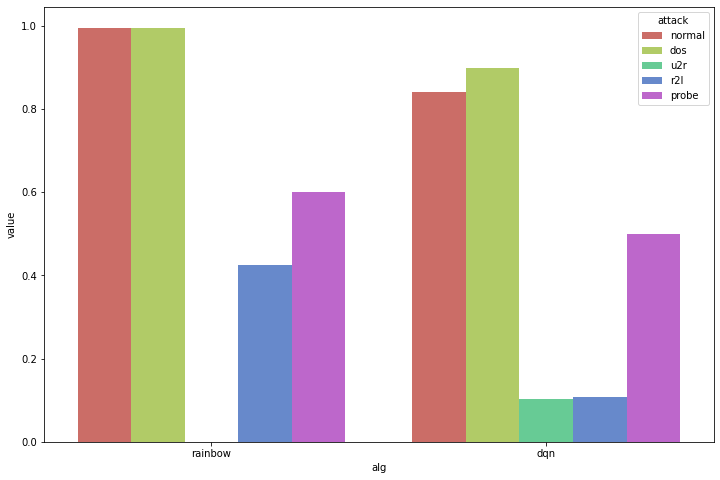

In [22]:
rec={'value':[],'attack':[],'alg':[]}
for a in attack_families:
    rec['value'].extend([rec_rainbow[a], rec_dqn[a]])
    rec['attack'].extend([a,a])
    rec['alg'].extend(['rainbow', 'dqn'])
rec = pd.DataFrame(rec)
# Figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.barplot(x = "alg", y = "value", hue = "attack", data = rec, palette = 'hls')
plt.show()

## F1 score

$$F1 = 2*\frac{\text{Precision}*\text{Recall}}{\text{Precision}+\text{Recall}}$$

In [23]:
# RAINBOW
print("RAINBOW")
f1_rainbow = {}
print("F1 Score:")
for a in attack_families:
    f1_rainbow[a] = 2*prec_rainbow[a]*rec_rainbow[a]/(prec_rainbow[a]+rec_rainbow[a])
print(json.dumps(f1_rainbow, indent=4))

# DQN
print("DQN")
f1_dqn = {}
print("F1 Score:")
for a in attack_families:
    f1_dqn[a] = 2*prec_dqn[a]*rec_dqn[a]/(prec_dqn[a]+rec_dqn[a])
print(json.dumps(f1_dqn, indent=4))

RAINBOW
F1 Score:
{
    "normal": 0.9905600391293715,
    "dos": 0.9959021803385005,
    "u2r": NaN,
    "r2l": 0.5249315068493151,
    "probe": 0.6903359889158296
}
DQN
F1 Score:
{
    "normal": 0.8682589101042868,
    "dos": 0.9344739379214213,
    "u2r": 0.0008573878250928836,
    "r2l": 0.029214850882531954,
    "probe": 0.2775967243252277
}


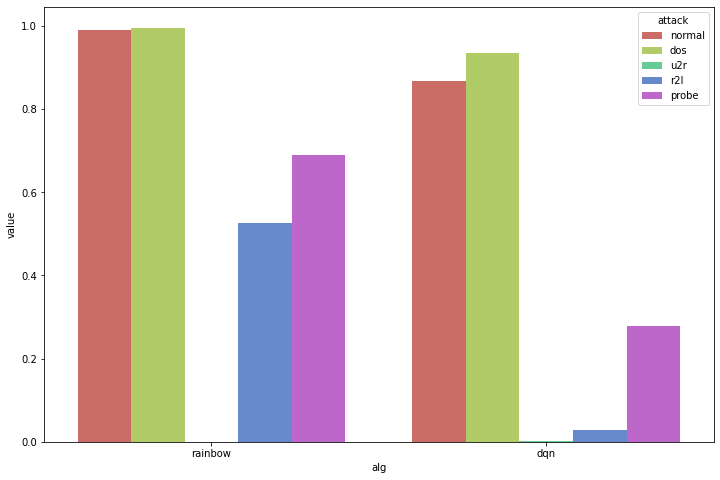

In [24]:
f1={'value':[],'attack':[],'alg':[]}
for a in attack_families:
    f1['value'].extend([f1_rainbow[a], f1_dqn[a]])
    f1['attack'].extend([a,a])
    f1['alg'].extend(['rainbow', 'dqn'])
f1 = pd.DataFrame(f1)
# Figure
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.barplot(x = "alg", y = "value", hue = "attack", data = f1, palette = 'hls')
plt.show()